<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2024 </h1> 
<h3 align="center">Day 3 2024 - Neuron Morphology</h3> 
<h3 align="center">Notebook 4: Analyzing Brain Connectivity via Projections of Light Microscopy Neurons</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 1: Introduction

<font size="4"> The main objective of this notebook is to analyze the <em>projections</em> of Light Microscopy (LM) neurons, meaning the regions of the brain that the axons and dendrites traverse to in order to communicate with the inputs and outputs located there. This type of long-range projection analysis is only applicable for the LM neurons since the EM neurons were reconstructed within a small piece of tissue fully contained within the visual cortex. In contrast, we will see that many LM neurons have axons that project across many brain regions, see Figure 1.  On the other hand, it does not show what specific neurons these neurons communicate with on the other side, whereas EM data can identify the sites and identities of synaptic partners.  As with many aspects of neuronscience, there is a tradeoff between scale and resolution, and depending on the question you are asking one dataset might make more sense than another.  </font>


<div style="text-align: center;">
    <img src='imgs/lm-vs-em.png' style="max-width: 65%; height: auto;">
</div>

<font size="4"><b> Figure 1:</b> LM neuron shown in blue and EM neuron shown in purple.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> As an introduction to analyzing projections of LM neurons, we will explore three open-ended questions related to brain connectivity that scientists consider when analyzing LM neurons. These questions aim to uncover both the fundamental connections and complex network dynamics that define the functional roles of these neurons within the broader neural circuitry. 

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 1:</strong> What do the inputs to a particular brain region look like? </font>

<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 2:</strong>  Where else do those inputs send their collaterals?  </font>
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 3:</strong> Are neuronal morphologies stereotyped, or are there distinct projection classes?

<font size="4"> These questions involve analyzing a large number of neurons to provide a general overview of how neurons <em>connect</em> different brain regions. In addition, these quetions build upon each other so Question 3 is easier to answer once Question 2 (and Question 1) is "answered".  Before addressing these questions, we must first understand the meaning of **connectivity** at the level of a single neuron **projection** patterns, then generalize this notion to the level of brain regions. In this context a neuron connects regions <em>A</em> and <em>B</em> if the neuron has dendritic endpoints in region <em>A</em> and axonal endpoints in region <em>B</em>. The dendritic endpoints receive the <em>input</em> of a neuron, whereas the axonal endpoints send the neuron's output.

<font size="4"> Brain regions being **connected** refers to the existence of many neurons between these region where information is transmitted from one source region to another target region. Given some brain region of interest, the inputs to this region are delivered via axonal endpoints and received by dendritic endpoints. Therefore, we can identify connected regions by extracting all axonal endpoints within a given region and determining the corresponding region of the soma.  **Note** because any particular dataset contains only a small subset of neurons in the brain one cannot be sure that this description of **input is complete**, but it is certaintly **precise**.

    
<font size="4"> Given a soma that projects one of these axons of interest, the refer to the additional axons originating from the same soma that transmit information to various other brain regions. This analysis leads to the follow up Question 3 which is asking whether the projections from somas consistent in the sense that other somas in the same region project to similar areas? By the end of this notebook, we will have developed the skills to answer these questions but also explore the data in a manner that leads to further analysis.


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<font size="4"> In this notebook, we use a python package called "brainglobe_atlasapi" which provides an API for querying information from the CCF atlas. We'll begin by downloading the Allen Mouse CCF with this package, then print out a lookup table that we use to query information about regions in this brain atlas.  </font>

In [1]:
from brainglobe_atlasapi import BrainGlobeAtlas
from utils.graph_utils import get_ccf_id_by_depth
from pprint import pprint


def get_ccf_name(ccf_id, depth=None):
    # Check for depth
    if depth:
        ccf_id = get_ccf_id_by_depth(ccf_id, depth)

    # Return name
    idx = ccf_atlas.lookup_df["id"] == ccf_id
    return ccf_atlas.lookup_df.loc[idx, "name"].iloc[0] if any(idx) else ccf_id


# Load the CCF structure data as a DataFrame
ccf_atlas = BrainGlobeAtlas('allen_mouse_100um')
ccf_atlas.lookup_df


brainglobe_atlasapi: allen_mouse_100um not found locally. Downloading...

Output()

,acronym,id,name
0,root,997,root
1,grey,8,Basic cell groups and regions
2,CH,567,Cerebrum
3,CTX,688,Cerebral cortex
4,CTXpl,695,Cortical plate
...,...,...,...
835,V3,129,third ventricle
836,AQ,140,cerebral aqueduct
837,V4,145,fourth ventricle
838,V4r,153,lateral recess


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4"> The ccf ids are stored as integers in a meshparty skeleton, so we'll use the function "get_ccf_name" to get the name of the region corresponding to a given id. Here is a simple example of using this function: </font>
    

In [5]:
# Report brain region
ccf_id = ccf_atlas.lookup_df["id"].sample().iloc[0]
print(f"The CCF ID '{ccf_id}' represents the '{get_ccf_name(ccf_id)}'")
pprint(ccf_atlas.structures[ccf_id])


The CCF ID '688' represents the 'Cerebral cortex'
{'acronym': 'CTX',
 'id': 688,
 'mesh': None,
 'mesh_filename': PosixPath('/root/.brainglobe/allen_mouse_100um_v1.2/meshes/688.obj'),
 'name': 'Cerebral cortex',
 'rgb_triplet': [176, 255, 184],
 'structure_id_path': [997, 8, 567, 688]}


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
    
<font size="4"> This function also has an optional argument called "depth" that traverses the region hierarchy to return the name of the region name for the given depth. </font>

In [6]:
# Report hierarchy
depth = 4
print("CCF Region:", get_ccf_name(ccf_id))
print("Ancestors of CCF Regions:", ccf_atlas.get_structure_ancestors(ccf_id))
print("Descendants of CCF Regions:", ccf_atlas.get_structure_descendants(ccf_id))
print(f"CCF Region at Depth {depth}:", get_ccf_name(ccf_id, depth=depth))


CCF Region: Cerebral cortex
Ancestors of CCF Regions: ['root', 'grey', 'CH']
Descendants of CCF Regions: ['CTXpl', 'Isocortex', 'FRP', 'FRP1', 'FRP2/3', 'FRP5', 'FRP6a', 'FRP6b', 'MO', 'MOp', 'MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b', 'SS', 'SSp', 'SSp-n', 'SSp-n1', 'SSp-n2/3', 'SSp-n4', 'SSp-n5', 'SSp-n6a', 'SSp-n6b', 'SSp-bfd', 'SSp-bfd1', 'SSp-bfd2/3', 'SSp-bfd4', 'SSp-bfd5', 'SSp-bfd6a', 'SSp-bfd6b', 'SSp-ll', 'SSp-ll1', 'SSp-ll2/3', 'SSp-ll4', 'SSp-ll5', 'SSp-ll6a', 'SSp-ll6b', 'SSp-m', 'SSp-m1', 'SSp-m2/3', 'SSp-m4', 'SSp-m5', 'SSp-m6a', 'SSp-m6b', 'SSp-ul', 'SSp-ul1', 'SSp-ul2/3', 'SSp-ul4', 'SSp-ul5', 'SSp-ul6a', 'SSp-ul6b', 'SSp-tr', 'SSp-tr1', 'SSp-tr2/3', 'SSp-tr4', 'SSp-tr5', 'SSp-tr6a', 'SSp-tr6b', 'SSp-un', 'SSp-un1', 'SSp-un2/3', 'SSp-un4', 'SSp-un5', 'SSp-un6a', 'SSp-un6b', 'SSs', 'SSs1', 'SSs2/3', 'SSs4', 'SSs5', 'SSs6a', 'SSs6b', 'GU', 'GU1', 'GU2/3', 'GU4', 'GU5', 'GU6a', 'GU6b', 'VISC', 'VISC1', 'VISC2/3', 'VISC4',

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 1.1:</b>  Find the most fine-grained brain region contained in the CCF (i.e. region at the largest depth).
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 1.2:</b>  How many brain regions are at a depth=0, 1,..., n where n is the depth value from Task 1.1.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section 2: Analyzing the Inputs to a Brain Region


### Imports

In [4]:
from random import sample
from utils.graph_utils import get_ccf_ids, get_connectivity_matrix
from utils.skeleton_loading_utils import number_of_samples, load_lm_datasets 

import matplotlib.pyplot as plt
import numpy as np
import skeleton_plot as skelplot
import seaborn as sns

%matplotlib inline


### Load Dataset

In [5]:
skel_list = load_lm_datasets()


Loading datasets...
exaSPIM_609281_2022-11-03_13-49-18_reconstructions:  [==================================================] 25/25
exaSPIM_651324_2023-03-06_15-13-25_reconstructions:  [==================================================] 13/13
exaSPIM_653158_2023-06-01_20-41-38_reconstructions:  [==================================================] 42/42
exaSPIM_653980_2023-08-10_20-08-29_reconstructions:  [==================================================] 20/20
mouselight_reconstructions:  [==================================================] 1549/1549


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## Connectivity of a Single Neuron

<font size="4"> Our journey to understand how the brain is connected begins with analyzing how a single neuron connects different regions. The purpose of this elementary analysis is to introduce a set of routines that simplify querying information such as finding all neurons with somas in a certain ccf region. We'll begin by choosing a skeleton from our dataset and performing the following query:
        
<font size="4"><strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Query 1:</strong> Which brain regions do the dendritic or axonal endpoints of a given neuron reside in? </font>

<font size="4"> Each skeleton has a node-level attribute called "id" that specifies where a node is located in ccf space. We will use subroutine called "get_ccf_ids" which is stored in "graph_utils.py". The purpose of this routine is to easily extract the ccf ids from vertices within a certain compartment (e.g. axons or dendrites) and/or vertices which are end points or branch points, see documentation for more details. Next, let's look at some simple examples of using the routine "get_ccf_ids" to determine what brain regions our skeleton passes through. </font>

In [7]:
# Subroutines
def report_distribution(values, cnt_threshold=0, percent_threshold=0, return_counts=False):
    ids, cnts = np.unique(values, return_counts=True)
    stat_symbol = "#" if return_counts else "%"
    item = "Neurons" if return_counts else "Vertices"
    print(f"{stat_symbol} {item}   CCF Region")
    for idx in np.argsort(-cnts):
        percent = 100 * cnts[idx] / len(values)
        ccf_id = get_ccf_name(ids[idx])
        if percent >= percent_threshold and cnts[idx] > cnt_threshold:
            value = cnts[idx] if return_counts else round(percent, 4)
            print(f"{value}      {ccf_id}")


# Choose a skeleton
skel = skel_list[0]
# skel = sample(skel_list, 1)[0]
            
# Root - CCF Compartment
soma_ccf = get_ccf_ids(skel, compartment_type=1)
print("Soma is in the", get_ccf_name(soma_ccf[0]))

# Dendrite Endpoints - CCF Regions
print("\nDistribution of CCF Regions of Dendritic Endpoints...")
dendrite_endpoints_ccf = get_ccf_ids(skel, compartment_type=3, vertex_type="end_points")
report_distribution(dendrite_endpoints_ccf, percent_threshold=1)

# Axon Endpoints - CCF Regions
print("\nDistribution of CCF Regions of Axonal Endpoints...")
axon_endpoints_ccf = get_ccf_ids(skel, compartment_type=2, vertex_type="end_points")
report_distribution(axon_endpoints_ccf, percent_threshold=1)

Soma is in the Lateral vestibular nucleus

Distribution of CCF Regions of Dendritic Endpoints...
% Vertices   CCF Region
30.0      Superior vestibular nucleus
20.0      Medial vestibular nucleus
14.0      Spinal vestibular nucleus
12.0      inferior cerebellar peduncle
6.0      Medulla
6.0      Lateral vestibular nucleus
4.0      dorsal acoustic stria
4.0      Koelliker-Fuse subnucleus
2.0      vestibular nerve
2.0      Dorsal cochlear nucleus

Distribution of CCF Regions of Axonal Endpoints...
% Vertices   CCF Region
35.0245      nan
10.4746      Medullary reticular nucleus, ventral part
9.9836      Midbrain reticular nucleus
7.365      Periaqueductal gray
6.5466      Gigantocellular reticular nucleus
5.5646      614454272.0
3.7643      Paragigantocellular reticular nucleus, dorsal part
3.7643      Red nucleus
3.6007      Nucleus prepositus
2.946      Midbrain
1.964      Medial vestibular nucleus
1.1457      Zona incerta
1.1457      Spinal vestibular nucleus


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size="4">Note: You may encounter a neuron that passes through "nan" or some integer valued region which are not valid ccf regions. This discrepancy is caused by minor misalignments of the brain sample to the ccf template caused during registration. </font>

(6844476.0, 13795194.0, 7933880.0, 3102649.0)

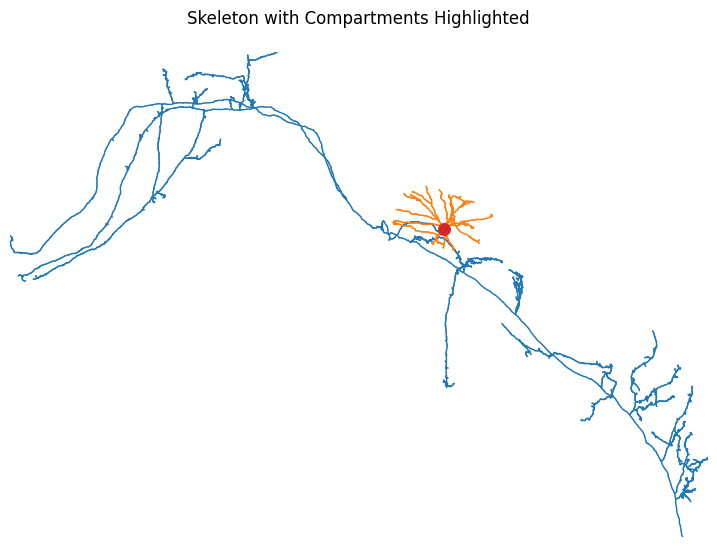

In [10]:
# Plot skeleton
f, ax = plt.subplots(figsize=(9, 14))
skelplot.plot_tools.plot_skel(
    skel,
    title="Skeleton with Compartments Highlighted\n",
    line_width=1,
    plot_soma=True,
    soma_size=70,
    pull_radius=True,
    invert_y=True,
    pull_compartment_colors=True,
    x="x",
    y="y",
    skel_color_map={1: "tab:red", 2: "tab:blue", 3: "tab:orange"},
)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<font size="4"><p><b>Exercise 2.1:</b> The routine "get_ccf_ids" has an optional argument called "depth" which takes queried ccf ids and maps them to the corresponding ccf ids at the specified level of the structure hierarchy. Write a routine that iterates over all of the possible depths for a neuron and prints out the number of regions that the neuron traverses for a given depth. How does this number change as you increase the depth?
    
</div>

In [8]:
#### put collateral analysis here

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
## Connectivity Between Brain Regions

<font size='4'> Next let's analyze the projection patterns of neurons in our dataset to understand the connections between different brain regions. We’ll start by identifying the locations of the somas of the neurons, then analyze the brain regions where these neurons are present. The location of the soma is important because it is highly correlated with where the neuron's dendrites are concentrated, which can influence its connectivity and functional role within the brain. By mapping these locations, we can gain insights into the neural circuits and how they contribute to overall brain function. </font>


### Soma Locations

In [8]:
# Get ccf ids of somas --> raw counts and threshold by some min # skeletons in region
soma_ccf_ids = [get_ccf_ids(skel, compartment_type=1, depth=7)[0] for skel in skel_list]
print("Distribution Somas Locations...")
report_distribution(soma_ccf_ids, cnt_threshold=15, return_counts=True)


Distribution Somas Locations...
# Neurons   CCF Region
313      Secondary motor area
76      Subiculum
62      Presubiculum
53      Primary motor area
53      Dentate gyrus
46      Ventral posterior complex of the thalamus
45      Ventral anterior-lateral complex of the thalamus
41      Ammon's horn
39      Pontine gray
33      Anterior cingulate area, dorsal part
30      Postsubiculum
29      Spinal nucleus of the trigeminal, interpolar part
23      dorsal hippocampal commissure
21      Mediodorsal nucleus of thalamus
20      Gigantocellular reticular nucleus
20      Lateral hypothalamic area
19      Posterior complex of the thalamus
18      484682464.0
18      Zona incerta
17      Ventral medial nucleus of the thalamus
17      Primary somatosensory area
16      Primary visual area
16      Tegmental reticular nucleus


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<font size='4'> Let's sample a brain region that contains at least 20 somas from our dataset, then analyze the projections of these neurons. We'll use a function called "sample_soma_location" which takes the variables "soma_ccf_ids" and "min_cnt", then samples a ccf id with at least "min_cnt" appearances in "soma_ccf_ids". Once we have selected a brain region, we'll simply print out the distribution of regions that contain endpoints of these neurons before proceeding to visualizing the connectivity.
    

In [9]:
def sample_soma():
    ids, cnts = np.unique(soma_ccf_ids, return_counts=True)
    if not any(cnts >= min_cnt):
        print(f"Warning: No ccf region with {min_cnt} somas, returning region with most somas!\n")
        return ids[np.argmax(cnts)]
    else:
        return sample(ids[cnts >= min_cnt].tolist(), 1)[0]


# Sample ccf_id and extract skeletons with soma with that ccf region
min_cnt = 30
ccf_id = 629.0  # sample_soma()  # 629.0
skels_subset = [skel for skel in skel_list if skel.vertex_properties['ccf'][skel.root] == ccf_id]
print(f"# Skeletons with Soma in {get_ccf_name(ccf_id)}:", len(skels_subset))

# Get ccf regions of endpoints
axon_endpoints_ccf = list()
dendrite_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=3, vertex_type="end_points").tolist())
    dendrite_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=2, vertex_type="end_points").tolist())

# Report distribution
print("\nDistribution of Dendrite Endpoints in CCF Space...")
report_distribution(dendrite_endpoints_ccf, percent_threshold=1)

print("\nDistribution of Axon Endpoints in CCF Space...")
report_distribution(axon_endpoints_ccf, percent_threshold=1)


# Skeletons with Soma in Ventral anterior-lateral complex of the thalamus: 45

Distribution of Dendrite Endpoints in CCF Space...
% Vertices   CCF Region
15.5127      Secondary motor area, layer 5
12.1232      Primary motor area, Layer 5
9.7999      Primary motor area, Layer 2/3
9.6551      Secondary motor area, layer 2/3
4.8901      Secondary motor area, layer 6a
4.7519      Primary motor area, Layer 6a
4.0806      Secondary motor area, layer 1
3.7515      Caudoputamen
3.0736      Ventral medial nucleus of the thalamus
2.297      Primary motor area, Layer 1
1.5138      Ventral anterior-lateral complex of the thalamus
1.3624      526157184.0
1.1847      Primary somatosensory area, mouth, layer 2/3
1.1386      Primary somatosensory area, upper limb, layer 5
1.007      Supplemental somatosensory area, layer 5

Distribution of Axon Endpoints in CCF Space...
% Vertices   CCF Region
73.046      Ventral anterior-lateral complex of the thalamus
6.6379      Posterior complex of the thalamus
5.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise 3.1:</b> Recall that we found which neurons traversed most and least brain regions in Exercise 2.2. Is this typical of neurons with somas in those same regions?
    
</div>

### Plot all neurons in this region

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Next, let's compute a connectivity matrix and visualize it as a heatmap by using the Python library "seaborne". In this matrix, each row corresponds to a neuron and the columns represent different brain regions. The entry at each ("row", "column") position is the number of endpoints that the neuron in "row" has within the brain region specified by that column. We'll generate this matrix with a routine called "get_connectivity_matrix" that takes "skels_subset" as an input, then returns the described connectivity matrix. </font>
    

## Mathew's section starts here

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section N: Analyzing divergent information flow
    
We've just looked at how inputs from different brain areas converge upon [REGION]. However neurons are not exclusive in their projections, and a given cell will often have branching axonal fields targeting multiple different brain areas. We can learn about how information flows through the brain by looking at what input channels are shared between brain regions. Phrased another way, which brain areas are targeted by distinct collaterals of the same neuron?
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 2:</strong>  Where else do inputs to [REGION] send their collaterals?  </font>


In [23]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import k3d

# Define plotting functions to turn a skeleton into line objects
def plot_graphs(graphs, plot, color = None):
    for i, g in enumerate(graphs):
        g_lines = graph_to_lines(g,color)
        plot += g_lines
        

def graph_to_lines(g,color=None):
    # Extract vertex positions
    g_verts = g.vertices
    
    # Pairs of indices into the vertex array are edges
    g_inds = g.edges
    
    # Could add iteration here to plot compartments in different colors
    
    g_lines = k3d.factory.lines(g_verts, g_inds, indices_type='segment', width=1, shader='simple')
    return g_lines

In [146]:
# Here we are setting up a lookup dictionary between CCF IDs and region acronyms. Some neurons have a small number of vertices with
# unrecognized IDs due to registration errors / differences in CCF versioning. Here we're using a default dict to set unrecognized
# IDs to a default value of NaN.
id_to_acronym = defaultdict(lambda: "NaN", ccf_atlas.lookup_df.set_index("id")["acronym"].to_dict())
acronym_to_id = {acronym: ccf_id for ccf_id, acronym in id_to_acronym.items()}

# REPLACE THIS PART WITH THE OUTPUT OF SECTION 1
soma_ccf_ids = [get_ccf_ids(skel, compartment_type=1)[0] for skel in skel_list]
skel = skel_list[np.argwhere([soma == 362 for soma in soma_ccf_ids]).flatten()[5]] # as a temporary fix I'm just grabbing neurons with somas in MD

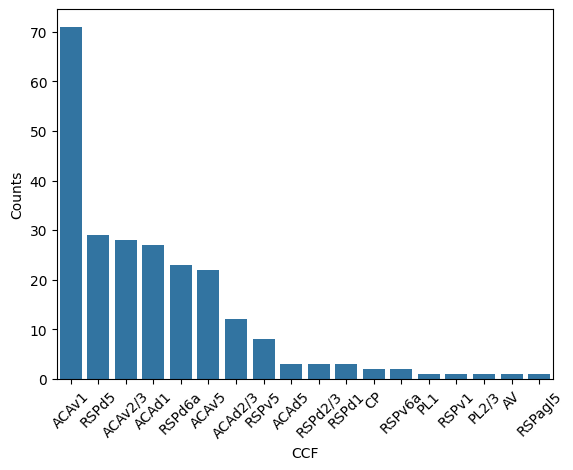

In [147]:
# Find the axon endpoints for our neuron and count how many terminate in each CCF region
axon_endpoints_ccf = get_ccf_ids(skel, compartment_type=2, vertex_type="end_points")
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)

# Convert IDs to CCF acronyms for plotting purposes
endpoint_dataframe = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})

# Plot the axonal endpoints of our selected neuron
sns.barplot(endpoint_dataframe.sort_values("Counts", ascending = False).head(20),x = "CCF",y = "Counts")
plt.xticks(rotation=45);

In [167]:
# Plot the full neuronal morphology (ideally with meshes)
plot = k3d.plot()
plot_graphs([skel], plot)
plot.display()

Output()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise N.1:</b> What fraction of this neuron's axonal endpoints are in our original target region of [REGION]? Does [REGION] seem to be this neuron's "primary" projection target?
</div>

In [149]:
# Answer (could likely be cleaned up)
total_endpoints = endpoint_dataframe.loc[:,"Counts"].sum()
region_mask = endpoint_dataframe.loc[:,"CCF"] == "ACAv1" #REGION
endpoint_dataframe.loc[region_mask,"Counts"] / total_endpoints

9    0.298319
Name: Counts, dtype: float64

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise N.2:</b> Compare the projections of this neuron to another neuron that projects to [REGION]. Do these neurons have similar whole-brain innervation patterns? Do they have somas in the same location?
    
</div>

In [89]:
# Answer (re-run code above with a different neuron selected)
indx = 2
skel = skel_list[np.argwhere([soma == 362 for soma in soma_ccf_ids]).flatten()[indx]]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
# Section N+1: Analyzing divergent information flow
    
We've now looked at a few of the diverse inputs to MD. How is this information integrated and distributed to the rest of the brain? Physiological experiments are best suited for interrogating how information is transformed across synapses. However morphological analysis can cue us into the output channels of the MD circuit. Do all MD neurons uniformly target the same brain structures, or is there diversity in their projection patterns? One way to formalize this question is with clustering analysis.
    
<font size="4"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>Question 3:</strong> Are neuronal morphologies stereotyped, or are there distinct projection classes?


In [222]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [223]:
# Grab neurons with somas in MD.
list_of_regions = ["MD"]
ccf_id_list = [acronym_to_id[region] for region in list_of_regions]
skels_subset = [skel for skel in skel_list if skel.vertex_properties['ccf'][skel.root] in ccf_id]
print(f"# Skeletons with somas in {list_of_regions}:", len(skels_subset))

# Skeletons with somas in ['MD']: 21


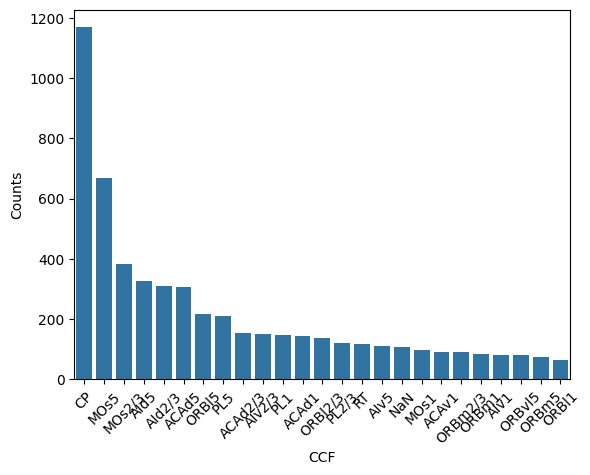

In [224]:
# First lets look at the projection targets of our population of neurons. We'll collect CCF endpoints:
axon_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=2, vertex_type="end_points"))

# Then we'll plot the total axonal endpoints of our population of neurons. To reduce visual clutter, we'll only plot the top 25 most targeted CCF structures.
number_of_structures_to_plot = 25
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)
total_endpoints = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})
sns.barplot(total_endpoints.sort_values("Counts", ascending = False).head(number_of_structures_to_plot),x = "CCF",y = "Counts")
plt.xticks(rotation=45);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise (N+1).1:</b> What are the most targeted brain regions by MD neurons? Does this change with the level of the CCF hierarchy that you're examining? Try plotting the top 5 structures when axonal endpoints are queried at CCF depth 5.
    
</div>

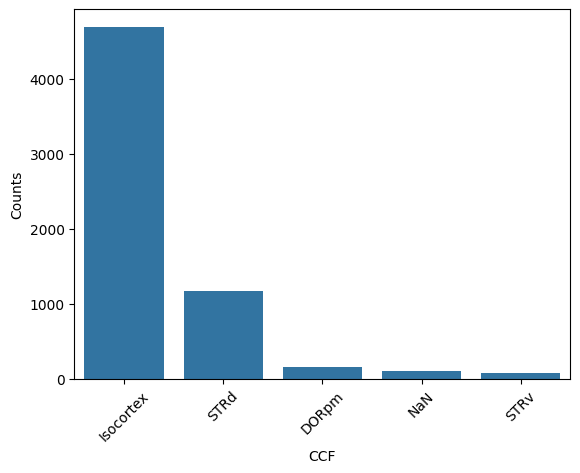

In [198]:
## Answer 
## (the point of this exercise is that dorsal striatum (or caudoputamen, CP above) might appear to be the most targeted structure 
## at the full depth level, but actually there are many many more cortical projections, they're just distributed between different
## regions of the isocortex

#re-run the code above with a new depth and number_of_structures_to_plot. both changes highlighted with comments below
axon_endpoints_ccf = list()
for skel in skels_subset:
    axon_endpoints_ccf.extend(get_ccf_ids(skel, compartment_type=2, vertex_type="end_points", depth = 5)) ### depth here

number_of_structures_to_plot = 5 ### number of structures here
ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True)
total_endpoints = pd.DataFrame({"CCF": [id_to_acronym[ccf_id] for ccf_id in ids], "Counts":cnts})
sns.barplot(total_endpoints.sort_values("Counts", ascending = False).head(number_of_structures_to_plot),x = "CCF",y = "Counts")
plt.xticks(rotation=45);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Next, let's try some simple clustering approaches to look at the diversity of our MD projections. We'll start by assembling a feature matrix where the rows are MD neurons and the columns are number of axonal endpoints in different CCF regions. You can imagine that other more exotic morphometric or topological features might have great descriptive power for distinguishing morphologies, but we'll keep things relatively simple for now.</font>
    

In [234]:
# Create a dictionary of each cell's axonal endpoints. We'll then convert this to a dataframe to allow for visualizations and clustering
skel_dict = {}

# Collect axon endpoints from every cell in our subset
for i, skel in enumerate(skels_subset):
    axon_endpoints_ccf = get_ccf_ids(skel, compartment_type=2, vertex_type="end_points")
    ids, cnts = np.unique(axon_endpoints_ccf, return_counts=True) # Count incidence of each terminal structure
    skel_dict[i] = dict(zip(ids,cnts)) # Bundle up CCF region IDs and counts for each cell
    
# Convert to dataframe, and remap column names from region IDs to region acronyms
df = pd.DataFrame.from_dict(skel_dict, orient='index').fillna(0)
df = df.loc[:, df.columns.isin(id_to_acronym.keys())]
df = df.rename(columns = id_to_acronym)
df = df.loc[:, df.columns != "NaN"] # remove any unrecognized CCF regions

In [235]:
# We can optionally trim our feature matrix to only include CCF regions that comprise a decent fraction of our total terminal endpoints across
# the population. Let's do so for now to reduce bloat in our visualizations, setting a threshold of at least 0.05% of the total endpoints.
trim_df = True
threshold = 0.0005

if trim_df:
    total_counts = df.sum(axis=0, numeric_only=True)
    cumsum = total_counts / sum(total_counts)
    keep_cols = cumsum > threshold
    df = df.loc[:,keep_cols]

<Axes: >

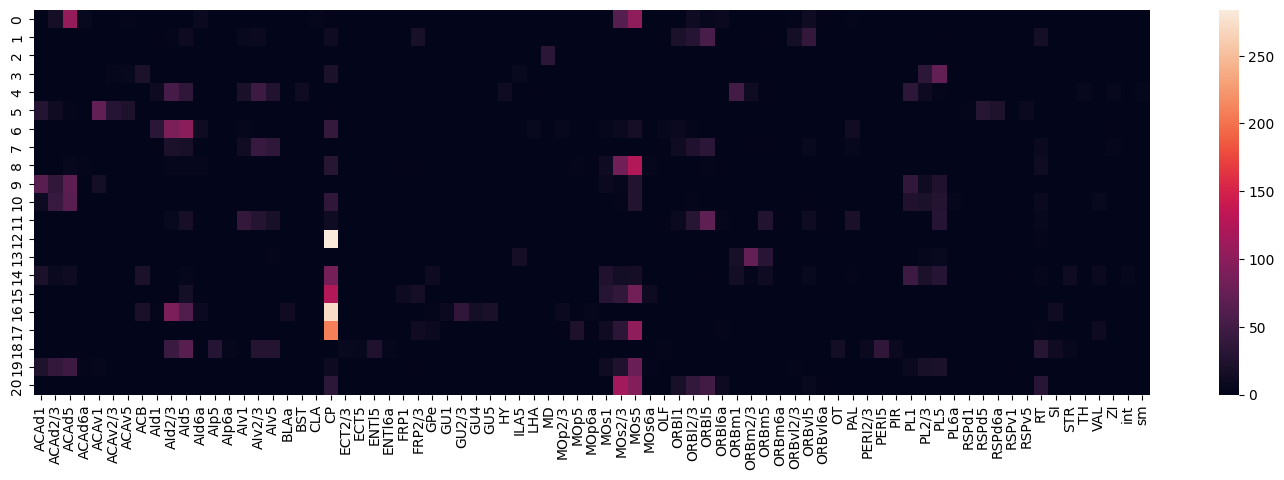

In [246]:
# Now lets visualize our feature matrix. We'll sort our columns to tidy up the visualization.
sorted_columns = sorted(df.columns)
df = df[sorted_columns] # Reorder the DataFrame based on sorted column names

plt.figure(figsize=(18,5))
sns.heatmap(df.sort_index())

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<font size='4'> Now, we'll employ a general purpose clustering algorithim called K Means. You can learn more here: https://scikit-learn.org/stable/modules/clustering.html#k-means. K Means requires specifying a number of output clusters a priori. We'll start with 3 clusters, and dig into more principled approaches for selecting this number later. </font>
    

In [271]:
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, n_init = "auto", random_state = 0)
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# We'll createa copy of our dataframe and add the cluster labels
df_clustered = df.copy()
df_clustered['cluster'] = labels

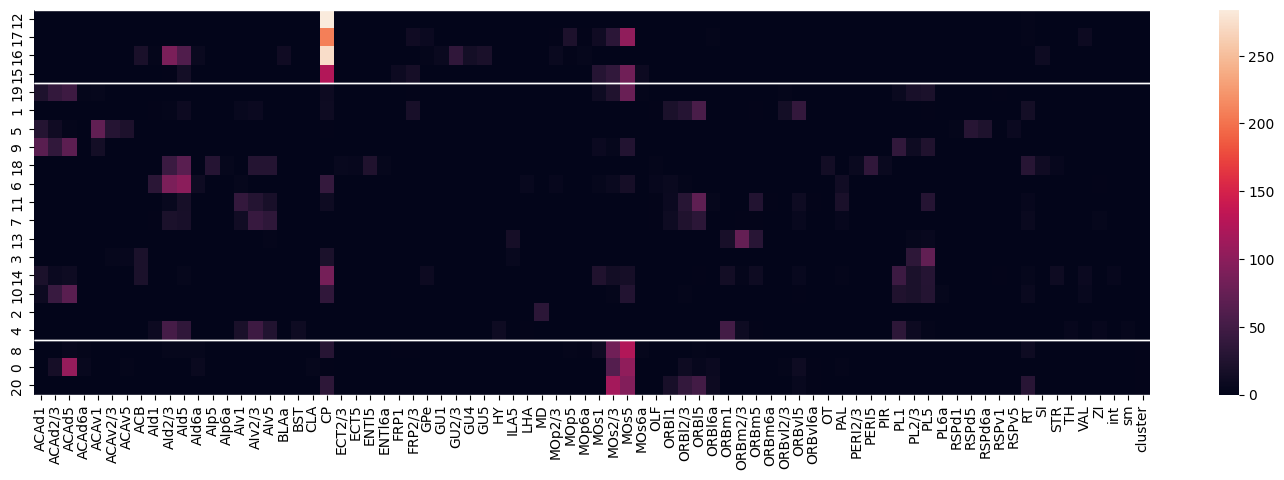

In [272]:
# Now lets visualize our clustering results.
df_clustered = df_clustered.sort_values("cluster") # sort by cluster label to organize plot

# Plot the heatmap
plt.figure(figsize=(18, 5))
sns.heatmap(df_clustered,  xticklabels=True)

# Outline clusters by adding lines
unique_clusters = df_clustered['cluster'].unique()
for cluster in unique_clusters:
    idx = np.where(df_clustered['cluster'] == cluster)[0]
    plt.hlines([min(idx), max(idx) + 1], *plt.xlim(), colors='white', linewidth=1)

In [273]:
# Let's also print the top structures targeted by each cluster.
top_regions = slice(0,3,1) # we'll specify that we want to look at the top 3 CCF regions
cluster_means = df_clustered.groupby("cluster").mean()
for i in range(len(cluster_means)):
    sorted_cluster_means = cluster_means.iloc[i,:].sort_values(ascending=False)
    output = ', '.join(f'({index}: {value:.{1}f})' for index, value in sorted_cluster_means[top_regions].items())
    print("Cluster #" + f"{i} top targets: " + output)

Cluster #0 top targets: (CP: 222.5), (MOs5: 46.2), (AId2/3: 22.5)
Cluster #1 top targets: (AId5: 17.8), (AId2/3: 15.4), (CP: 15.3)
Cluster #2 top targets: (MOs5: 107.3), (MOs2/3: 87.0), (ACAd5: 37.0)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise (N+1).2:</b> Our feature matrix is a reduced representation of the original data. Let's check if our clustering makes sense by inspecting the morphologies belonging to a given cluster. Plot all of the neurons belonging to cluster 0 below.
    
</div>

In [290]:
## Answer (this answer needs modification - it's setting x,y,z bounds based off the first item plotted. Would likely be fixed by plotting whole brain mesh first.)
cluster_to_plot = 0

# Plot the full neuronal morphology (ideally with meshes)
plot = k3d.plot()
for skel in [skels_subset[i] for i in np.where(df_clustered["cluster"] == cluster_to_plot)[0]]:
    plot_graphs([skel], plot)
plot.display()

Output()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<font size="4"><p><b>Exercise (N+1).3:</b> K Means clustering requires specifying a number of K clusters to split your samples into a priori. However we rarely know in advance how many groups our data should be split into, and above we've chosen to specify 3 clusters somewhat arbitrarily. There isn't a definitive and absolute answer to the appropriate number of clusters to specify, but there are tools we can use to guide our selection of K. One tool is a metric called the silhouette score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py), which quantifies the proximity of points within clusters relative to points outside that cluster. Silhouette scores near 1 indicate clusters are very distinct, while values closer to 0 indicate points are close to the boundaries between clusters. 
    
Let's compare K Means Silhouette scores for different numbers of K. We've laid out some code to get you started below. Afterward, visualize and examine the clustering results for a few different values of K. Remember that Silhouette scores are only a tool to guide our selection of K, but are not the ultimate determinants of biological "truth".
</div>

In [ ]:
## Guide
range_n_clusters = range(2, 15)
silhouette_avg = []

for k in range_n_clusters:
    # Code here!
    
    
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plotting silhouette
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, silhouette_avg, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Selection of K clusters')

Text(0.5, 1.0, 'Selection of K clusters')

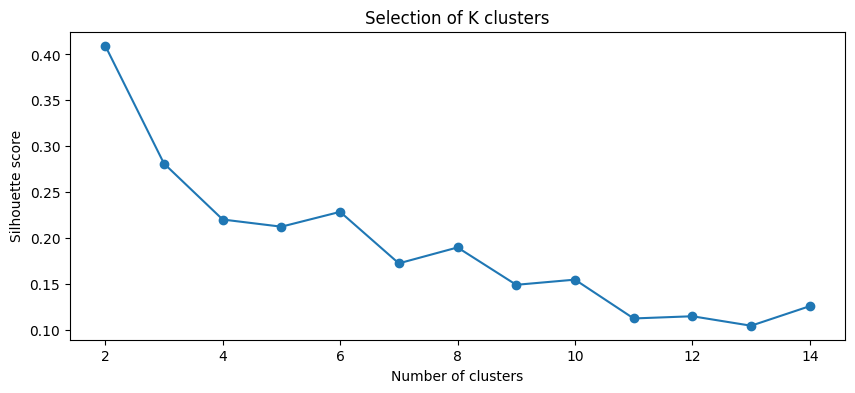

In [297]:
## Answer
range_n_clusters = range(2, 15)
silhouette_avg = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init = "auto",  random_state = 0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plotting silhouette
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, silhouette_avg, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Selection of K clusters')